In [1]:
import csv
import requests
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:.2f}'.format

# ETL

### Internet_BAF.xlsx

In [3]:
os.getcwd()

'/home/p/Code/Henry/PI_DA/notebooks'

In [4]:
# 
df_dial_baf = pd.read_excel('../data/raw/1- Internet_BAF.xlsx', sheet_name='Dial-BAf')
# 
df_dial_totales = pd.read_excel('../data/raw/1- Internet_BAF.xlsx', sheet_name='Totales')

In [5]:
df_dial_baf.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.00,4794665
1,2022,4,Capital Federal,1549781,2145.00,1551926
2,2022,4,Catamarca,70908,1.00,70909
3,2022,4,Chaco,143658,5.00,143663
4,2022,4,Chubut,167855,904.00,168759


In [6]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_dial_baf):
    # Replace missing values with 0 in column: 'Dial up'
    df_dial_baf = df_dial_baf.fillna({'Dial up': 0})
    # Change column type to category for columns: 'Año', 'Trimestre', 'Provincia'
    df_dial_baf = df_dial_baf.astype({'Año': 'category', 'Trimestre': 'category', 'Provincia': 'category'})
    return df_dial_baf

df_dial_baf = clean_data(df_dial_baf.copy())
df_dial_baf.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.00,4794665
1,2022,4,Capital Federal,1549781,2145.00,1551926
2,2022,4,Catamarca,70908,1.00,70909
3,2022,4,Chaco,143658,5.00,143663
4,2022,4,Chubut,167855,904.00,168759


In [46]:
df_dial_baf.to_csv('../data/processed/internet_baf.csv', index=False)

In [44]:
df_dial_totales.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11195668,12446,11208114,Oct-Dic 2022
1,2022,3,11078691,12437,11091128,Jul-Sept 2022
2,2022,2,10946248,12436,10958684,Abr-Jun 2022
3,2022,1,10611390,12619,10624009,Ene-Mar 2022
4,2021,4,10476933,12861,10489794,Oct-Dic 2021


In [45]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_dial_totales):
    # Drop column: 'Periodo'
    df_dial_totales = df_dial_totales.drop(columns=['Periodo'])
    # Change column type to int64 for columns: 'Banda ancha fija', 'Dial up', 'Total'
    df_dial_totales = df_dial_totales.astype({'Banda ancha fija': 'int64', 'Dial up': 'int64', 'Total': 'int64'})
    # Change column type to category for columns: 'Año', 'Trimestre'
    df_dial_totales = df_dial_totales.astype({'Año': 'category', 'Trimestre': 'category'})
    return df_dial_totales

df_dial_totales = clean_data(df_dial_totales.copy())
df_dial_totales.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total
0,2022,4,11195668,12446,11208114
1,2022,3,11078691,12437,11091128
2,2022,2,10946248,12436,10958684
3,2022,1,10611390,12619,10624009
4,2021,4,10476933,12861,10489794


In [47]:
df_dial_totales.to_csv('../data/processed/internet_baf_totales.csv', index=False)

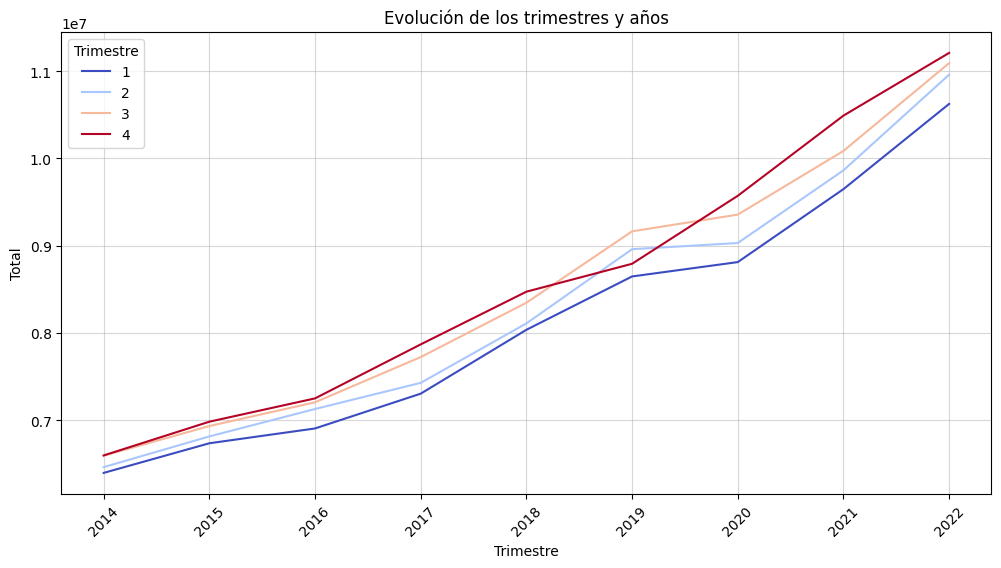

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_dial_totales, x='Año', y='Total', hue='Trimestre', palette='coolwarm')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.title('Evolución de los trimestres y años')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

### Internet_Ingresos.xlsx

In [13]:
df_internet_ingresos = pd.read_excel('../data/raw/2- Internet_Ingresos.xlsx')

In [14]:
df_internet_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [15]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_internet_ingresos):
    # Round column 'Ingresos (miles de pesos)' (Number of decimals: 2)
    df_internet_ingresos = df_internet_ingresos.round({'Ingresos (miles de pesos)': 2})
    return df_internet_ingresos

df_internet_ingresos = clean_data(df_internet_ingresos.copy())
df_internet_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72443482.99,Oct-Dic 2022
1,2022,3,64086784.33,Jul-Sept 2022
2,2022,2,60419500.62,Abr-Jun 2022
3,2022,1,55219313.01,Ene-Mar 2022
4,2021,4,45467887.17,Oct-Dic 2021


In [16]:
df_internet_ingresos.to_csv('../data/processed/internet_ingresos.csv', index=False)

### Internet-Accesos-por-tecno_por_loc.xlsxx

In [17]:
df_internet_tecnologia_localidad = pd.read_excel('../data/raw/3- Internet-Accesos-por-tecno_por_loc.xlsx')

In [18]:
df_internet_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [19]:
def clean_data(df_internet_tecnologia_localidad):
    # Replace missing values with 0 in columns: 'Otros', '0,256 Mbps' and 128 other columns
    df_internet_tecnologia_localidad = df_internet_tecnologia_localidad.fillna({'Otros': 0, '0,256 Mbps': 0, '0,375 Mbps': 0, '0,5 Mbps': 0, '0,512 Mbps': 0, '0,625 Mbps': 0, '0,75 Mbps': 0, '1 Mbps': 0, '1,25 Mbps': 0, '1,5 Mbps': 0, '2 Mbps': 0, '2,2 Mbps': 0, '2,5 Mbps': 0, '3 Mbps': 0, '3,3 Mbps': 0, '3,5 Mbps': 0, '4 Mbps': 0, '4,5 Mbps': 0, '5 Mbps': 0, '6 Mbps': 0, '6,4 Mbps': 0, '7 Mbps': 0, '7,5 Mbps': 0, '8 Mbps': 0, '9 Mbps': 0, '10 Mbps': 0, '10,2 Mbps': 0, '11 Mbps': 0, '12 Mbps': 0, '12,3 Mbps': 0, '13 Mbps': 0, '14 Mbps': 0, '15 Mbps': 0, '16 Mbps': 0, '17 Mbps': 0, '18 Mbps': 0, '20 Mbps': 0, '20,5 Mbps': 0, '21 Mbps': 0, '22 Mbps': 0, '23 Mbps': 0, '24 Mbps': 0, '25 Mbps': 0, '25,1 Mbps': 0, '25,5 Mbps': 0, '26 Mbps': 0, '27 Mbps': 0, '30 Mbps': 0, '31 Mbps': 0, '32 Mbps': 0, '34 Mbps': 0, '35 Mbps': 0, '36 Mbps': 0, '38 Mbps': 0, '39 Mbps': 0, '40 Mbps': 0, '41 Mbps': 0, '45 Mbps': 0, '46 Mbps': 0, '48 Mbps': 0, '49 Mbps': 0, '50 Mbps': 0, '50,1 Mbps': 0, '50,25 Mbps': 0, '51 Mbps': 0, '55 Mbps': 0, '58 Mbps': 0, '59 Mbps': 0, '60 Mbps': 0, '61 Mbps': 0, '62 Mbps': 0, '64 Mbps': 0, '65 Mbps': 0, '66 Mbps': 0, '70 Mbps': 0, '75 Mbps': 0, '78 Mbps': 0, '80 Mbps': 0, '83 Mbps': 0, '85 Mbps': 0, '90 Mbps': 0, '92 Mbps': 0, '95 Mbps': 0, '100 Mbps': 0, '100,25 Mbps': 0, '110 Mbps': 0, '120 Mbps': 0, '122 Mbps': 0, '125 Mbps': 0, '126 Mbps': 0, '130 Mbps': 0, '140 Mbps': 0, '150 Mbps': 0, '157 Mbps': 0, '158 Mbps': 0, '160 Mbps': 0, '164 Mbps': 0, '165 Mbps': 0, '180 Mbps': 0, '200 Mbps': 0, '212 Mbps': 0, '220 Mbps': 0, '225 Mbps': 0, '234 Mbps': 0, '240 Mbps': 0, '250 Mbps': 0, '256 Mbps': 0, '275 Mbps': 0, '300 Mbps': 0, '320 Mbps': 0, '325 Mbps': 0, '330 Mbps': 0, '340 Mbps': 0, '400 Mbps': 0, '450 Mbps': 0, '480 Mbps': 0, '500 Mbps': 0, '512 Mbps': 0, '520 Mbps': 0, '540 Mbps': 0, '600 Mbps': 0, '680 Mbps': 0, '700 Mbps': 0, '800 Mbps': 0, '850 Mbps': 0, '900 Mbps': 0, '950 Mbps': 0, '1000 Mbps': 0, '1024 Mbps': 0, 'Total general': 0})
    # Change column type to string for column: 'Localidad'
    df_internet_tecnologia_localidad = df_internet_tecnologia_localidad.astype({'Localidad': 'string'})
    # Change column type to string for columns: 'Partido', 'Provincia'
    df_internet_tecnologia_localidad = df_internet_tecnologia_localidad.astype({'Partido': 'string', 'Provincia': 'string'})
    return df_internet_tecnologia_localidad

df_internet_tecnologia_localidad = clean_data(df_internet_tecnologia_localidad.copy())
df_internet_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [28]:
df_internet_tecnologia_localidad.to_csv('../data/processed/internet_accesos_tecnologia_localidad.csv', index=False)

### Internet_Accesos-por-velocidad_provincia_sin rangos.xlsx

In [14]:
df_int_acc_vel_prov = pd.read_excel('../data/raw/4- Internet_Accesos-por-velocidad_provincia_sin rangos.xlsx')

In [15]:
df_int_acc_vel_prov.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_int_acc_vel_prov):
    # Replace missing values with 0 in columns: 'Otros', '0,256 Mbps' and 180 other columns
    df_int_acc_vel_prov = df_int_acc_vel_prov.fillna({'Otros': 0, '0,256 Mbps': 0, '10000 Mbps': 0, '8000 Mbps': 0, '7000 Mbps': 0, '6000 Mbps': 0, '5125 Mbps': 0, '5000 Mbps': 0, '4000 Mbps': 0, '3072 Mbps': 0, '2529 Mbps': 0, '2048 Mbps': 0, '2000 Mbps': 0, '1536 Mbps': 0, '1075 Mbps': 0, '1024 Mbps': 0, '1000 Mbps': 0, '950 Mbps': 0, '945 Mbps': 0, '900 Mbps': 0, '850 Mbps': 0, '800 Mbps': 0, '768 Mbps': 0, '700 Mbps': 0, '680 Mbps': 0, '640 Mbps': 0, '600 Mbps': 0, '540 Mbps': 0, '520 Mbps': 0, '512 Mbps': 0, '500 Mbps': 0, '480 Mbps': 0, '473 Mbps': 0, '450 Mbps': 0, '400 Mbps': 0, '384 Mbps': 0, '380 Mbps': 0, '350 Mbps': 0, '340 Mbps': 0, '330 Mbps': 0, '325 Mbps': 0, '320 Mbps': 0, '300 Mbps': 0, '275 Mbps': 0, '270 Mbps': 0, '256 Mbps': 0, '250 Mbps': 0, '240 Mbps': 0, '234 Mbps': 0, '225 Mbps': 0, '220 Mbps': 0, '212 Mbps': 0, '203 Mbps': 0, '200 Mbps': 0, '180 Mbps': 0, '165 Mbps': 0, '164 Mbps': 0, '160 Mbps': 0, '158 Mbps': 0, '150 Mbps': 0, '157 Mbps': 0, '145 Mbps': 0, '140 Mbps': 0, '137 Mbps': 0, '134 Mbps': 0, '131 Mbps': 0, '130 Mbps': 0, '128 Mbps': 0, '127 Mbps': 0, '126 Mbps': 0, '125 Mbps': 0, '122 Mbps': 0, '120 Mbps': 0, '110 Mbps': 0, '109 Mbps': 0, '105 Mbps': 0, '100,25 Mbps': 0, '100 Mbps': 0, '98 Mbps': 0, '95 Mbps': 0, '92 Mbps': 0, '91 Mbps': 0, '90 Mbps': 0, '85 Mbps': 0, '84 Mbps': 0, '86 Mbps': 0, '82 Mbps': 0, '83 Mbps': 0, '81 Mbps': 0, '80 Mbps': 0, '78 Mbps': 0, '77 Mbps': 0, '75 Mbps': 0, '71 Mbps': 0, '70 Mbps': 0, '68 Mbps': 0, '67 Mbps': 0, '66 Mbps': 0, '65 Mbps': 0, '64 Mbps': 0, '63 Mbps': 0, '62 Mbps': 0, '61 Mbps': 0, '60 Mbps': 0, '59 Mbps': 0, '58 Mbps': 0, '56 Mbps': 0, '55 Mbps': 0, '54 Mbps': 0, '52 Mbps': 0, '50,25 Mbps': 0, '51 Mbps': 0, '50,1 Mbps': 0, '49 Mbps': 0, '50 Mbps': 0, '48 Mbps': 0, '47 Mbps': 0, '46 Mbps': 0, '45 Mbps': 0, '41 Mbps': 0, '40 Mbps': 0, '39 Mbps': 0, '38 Mbps': 0, '37 Mbps': 0, '36 Mbps': 0, '35 Mbps': 0, '34 Mbps': 0, '32 Mbps': 0, '31 Mbps': 0, '30 Mbps': 0, '29 Mbps': 0, '28 Mbps': 0, '27 Mbps': 0, '26 Mbps': 0, '25,5 Mbps': 0, '25,11 Mbps': 0, '25,1 Mbps': 0, '25 Mbps': 0, '24 Mbps': 0, '23 Mbps': 0, '22 Mbps': 0, '21 Mbps': 0, '20,5 Mbps': 0, '20 Mbps': 0, '19 Mbps': 0, '18 Mbps': 0, '17 Mbps': 0, '16 Mbps': 0, '15 Mbps': 0, '14 Mbps': 0, '13 Mbps': 0, '12,3 Mbps': 0, '12 Mbps': 0, '11 Mbps': 0, '10,6 Mbps': 0, '10,2 Mbps': 0, '10 Mbps': 0, '9 Mbps': 0, '8 Mbps': 0, '7,5 Mbps': 0, '7 Mbps': 0, '6,4 Mbps': 0, '6 Mbps': 0, '5 Mbps': 0, '4,5 Mbps': 0, '4 Mbps': 0, '3,5 Mbps': 0, '3,3 Mbps': 0, '3,2 Mbps': 0, '3 Mbps': 0, '6,7 Mbps': 0, '2,2 Mbps': 0, '2 Mbps': 0, '1,5 Mbps': 0, '1,25 Mbps': 0, '1,2 Mbps': 0, '1 Mbps': 0, '0,75 Mbps': 0, '0,512 Mbps': 0, '0,5 Mbps': 0, '0,625 Mbps': 0, '0,375 Mbps': 0})
    # Change column type to int64 for columns: 'Otros', '0,256 Mbps' and 181 other columns
    df_int_acc_vel_prov = df_int_acc_vel_prov.astype({'Otros': 'int64', '0,256 Mbps': 'int64', '0,375 Mbps': 'int64', '0,625 Mbps': 'int64', '0,5 Mbps': 'int64', '0,512 Mbps': 'int64', '0,75 Mbps': 'int64', '1 Mbps': 'int64', '1,2 Mbps': 'int64', '1,25 Mbps': 'int64', '1,5 Mbps': 'int64', '2 Mbps': 'int64', '2,2 Mbps': 'int64', '2,5 Mbps': 'int64', '6,7 Mbps': 'int64', '3 Mbps': 'int64', '3,2 Mbps': 'int64', '3,3 Mbps': 'int64', '3,5 Mbps': 'int64', '4 Mbps': 'int64', '4,5 Mbps': 'int64', '5 Mbps': 'int64', '6 Mbps': 'int64', '6,4 Mbps': 'int64', '7 Mbps': 'int64', '7,5 Mbps': 'int64', '8 Mbps': 'int64', '9 Mbps': 'int64', '10 Mbps': 'int64', '10,2 Mbps': 'int64', '10,6 Mbps': 'int64', '11 Mbps': 'int64', '12 Mbps': 'int64', '12,3 Mbps': 'int64', '13 Mbps': 'int64', '14 Mbps': 'int64', '15 Mbps': 'int64', '16 Mbps': 'int64', '17 Mbps': 'int64', '18 Mbps': 'int64', '19 Mbps': 'int64', '20 Mbps': 'int64', '20,5 Mbps': 'int64', '21 Mbps': 'int64', '22 Mbps': 'int64', '23 Mbps': 'int64', '24 Mbps': 'int64', '25 Mbps': 'int64', '25,1 Mbps': 'int64', '25,11 Mbps': 'int64', '25,5 Mbps': 'int64', '26 Mbps': 'int64', '27 Mbps': 'int64', '28 Mbps': 'int64', '29 Mbps': 'int64', '30 Mbps': 'int64', '31 Mbps': 'int64', '32 Mbps': 'int64', '34 Mbps': 'int64', '35 Mbps': 'int64', '36 Mbps': 'int64', '37 Mbps': 'int64', '38 Mbps': 'int64', '39 Mbps': 'int64', '40 Mbps': 'int64', '41 Mbps': 'int64', '45 Mbps': 'int64', '46 Mbps': 'int64', '47 Mbps': 'int64', '48 Mbps': 'int64', '49 Mbps': 'int64', '50 Mbps': 'int64', '50,1 Mbps': 'int64', '51 Mbps': 'int64', '50,25 Mbps': 'int64', '52 Mbps': 'int64', '54 Mbps': 'int64', '55 Mbps': 'int64', '56 Mbps': 'int64', '58 Mbps': 'int64', '59 Mbps': 'int64', '60 Mbps': 'int64', '61 Mbps': 'int64', '62 Mbps': 'int64', '63 Mbps': 'int64', '64 Mbps': 'int64', '65 Mbps': 'int64', '66 Mbps': 'int64', '67 Mbps': 'int64', '68 Mbps': 'int64', '70 Mbps': 'int64', '71 Mbps': 'int64', '75 Mbps': 'int64', '77 Mbps': 'int64', '78 Mbps': 'int64', '80 Mbps': 'int64', '81 Mbps': 'int64', '83 Mbps': 'int64', '82 Mbps': 'int64', '86 Mbps': 'int64', '84 Mbps': 'int64', '85 Mbps': 'int64', '90 Mbps': 'int64', '91 Mbps': 'int64', '92 Mbps': 'int64', '95 Mbps': 'int64', '98 Mbps': 'int64', '100 Mbps': 'int64', '100,25 Mbps': 'int64', '105 Mbps': 'int64', '109 Mbps': 'int64', '110 Mbps': 'int64', '120 Mbps': 'int64', '122 Mbps': 'int64', '125 Mbps': 'int64', '126 Mbps': 'int64', '127 Mbps': 'int64', '128 Mbps': 'int64', '130 Mbps': 'int64', '131 Mbps': 'int64', '134 Mbps': 'int64', '137 Mbps': 'int64', '140 Mbps': 'int64', '145 Mbps': 'int64', '150 Mbps': 'int64', '157 Mbps': 'int64', '158 Mbps': 'int64', '160 Mbps': 'int64', '164 Mbps': 'int64', '165 Mbps': 'int64', '180 Mbps': 'int64', '200 Mbps': 'int64', '203 Mbps': 'int64', '212 Mbps': 'int64', '220 Mbps': 'int64', '225 Mbps': 'int64', '234 Mbps': 'int64', '240 Mbps': 'int64', '250 Mbps': 'int64', '256 Mbps': 'int64', '270 Mbps': 'int64', '275 Mbps': 'int64', '300 Mbps': 'int64', '320 Mbps': 'int64', '325 Mbps': 'int64', '330 Mbps': 'int64', '340 Mbps': 'int64', '350 Mbps': 'int64', '380 Mbps': 'int64', '384 Mbps': 'int64', '400 Mbps': 'int64', '450 Mbps': 'int64', '473 Mbps': 'int64', '480 Mbps': 'int64', '500 Mbps': 'int64', '512 Mbps': 'int64', '520 Mbps': 'int64', '540 Mbps': 'int64', '600 Mbps': 'int64', '640 Mbps': 'int64', '680 Mbps': 'int64', '700 Mbps': 'int64', '768 Mbps': 'int64', '800 Mbps': 'int64', '850 Mbps': 'int64', '900 Mbps': 'int64', '945 Mbps': 'int64', '950 Mbps': 'int64', '1000 Mbps': 'int64', '1024 Mbps': 'int64', '1075 Mbps': 'int64', '1536 Mbps': 'int64', '2000 Mbps': 'int64', '2048 Mbps': 'int64', '2529 Mbps': 'int64', '3072 Mbps': 'int64', '4000 Mbps': 'int64', '5000 Mbps': 'int64', '5125 Mbps': 'int64', '6000 Mbps': 'int64', '7000 Mbps': 'int64', '8000 Mbps': 'int64', '10000 Mbps': 'int64'})
    # Drop rows with missing data in column: 'Año'
    df_int_acc_vel_prov = df_int_acc_vel_prov.dropna(subset=['Año'])
    # Change column type to int64 for columns: 'Año', 'Otros' and 182 other columns
    df_int_acc_vel_prov = df_int_acc_vel_prov.astype({'Año': 'int64', 'Otros': 'int64', '0,256 Mbps': 'int64', '0,375 Mbps': 'int64', '0,625 Mbps': 'int64', '0,5 Mbps': 'int64', '0,512 Mbps': 'int64', '0,75 Mbps': 'int64', '1 Mbps': 'int64', '1,2 Mbps': 'int64', '1,25 Mbps': 'int64', '1,5 Mbps': 'int64', '2 Mbps': 'int64', '2,2 Mbps': 'int64', '2,5 Mbps': 'int64', '6,7 Mbps': 'int64', '3 Mbps': 'int64', '3,2 Mbps': 'int64', '3,3 Mbps': 'int64', '3,5 Mbps': 'int64', '4 Mbps': 'int64', '4,5 Mbps': 'int64', '5 Mbps': 'int64', '6 Mbps': 'int64', '6,4 Mbps': 'int64', '7 Mbps': 'int64', '7,5 Mbps': 'int64', '8 Mbps': 'int64', '9 Mbps': 'int64', '10 Mbps': 'int64', '10,2 Mbps': 'int64', '10,6 Mbps': 'int64', '11 Mbps': 'int64', '12 Mbps': 'int64', '12,3 Mbps': 'int64', '13 Mbps': 'int64', '14 Mbps': 'int64', '15 Mbps': 'int64', '16 Mbps': 'int64', '17 Mbps': 'int64', '18 Mbps': 'int64', '19 Mbps': 'int64', '20 Mbps': 'int64', '20,5 Mbps': 'int64', '21 Mbps': 'int64', '22 Mbps': 'int64', '23 Mbps': 'int64', '24 Mbps': 'int64', '25 Mbps': 'int64', '25,1 Mbps': 'int64', '25,11 Mbps': 'int64', '25,5 Mbps': 'int64', '26 Mbps': 'int64', '27 Mbps': 'int64', '28 Mbps': 'int64', '29 Mbps': 'int64', '30 Mbps': 'int64', '31 Mbps': 'int64', '32 Mbps': 'int64', '34 Mbps': 'int64', '35 Mbps': 'int64', '36 Mbps': 'int64', '37 Mbps': 'int64', '38 Mbps': 'int64', '39 Mbps': 'int64', '40 Mbps': 'int64', '41 Mbps': 'int64', '45 Mbps': 'int64', '46 Mbps': 'int64', '47 Mbps': 'int64', '48 Mbps': 'int64', '49 Mbps': 'int64', '50 Mbps': 'int64', '50,1 Mbps': 'int64', '51 Mbps': 'int64', '50,25 Mbps': 'int64', '52 Mbps': 'int64', '54 Mbps': 'int64', '55 Mbps': 'int64', '56 Mbps': 'int64', '58 Mbps': 'int64', '59 Mbps': 'int64', '60 Mbps': 'int64', '61 Mbps': 'int64', '62 Mbps': 'int64', '63 Mbps': 'int64', '64 Mbps': 'int64', '65 Mbps': 'int64', '66 Mbps': 'int64', '67 Mbps': 'int64', '68 Mbps': 'int64', '70 Mbps': 'int64', '71 Mbps': 'int64', '75 Mbps': 'int64', '77 Mbps': 'int64', '78 Mbps': 'int64', '80 Mbps': 'int64', '81 Mbps': 'int64', '83 Mbps': 'int64', '82 Mbps': 'int64', '86 Mbps': 'int64', '84 Mbps': 'int64', '85 Mbps': 'int64', '90 Mbps': 'int64', '91 Mbps': 'int64', '92 Mbps': 'int64', '95 Mbps': 'int64', '98 Mbps': 'int64', '100 Mbps': 'int64', '100,25 Mbps': 'int64', '105 Mbps': 'int64', '109 Mbps': 'int64', '110 Mbps': 'int64', '120 Mbps': 'int64', '122 Mbps': 'int64', '125 Mbps': 'int64', '126 Mbps': 'int64', '127 Mbps': 'int64', '128 Mbps': 'int64', '130 Mbps': 'int64', '131 Mbps': 'int64', '134 Mbps': 'int64', '137 Mbps': 'int64', '140 Mbps': 'int64', '145 Mbps': 'int64', '150 Mbps': 'int64', '157 Mbps': 'int64', '158 Mbps': 'int64', '160 Mbps': 'int64', '164 Mbps': 'int64', '165 Mbps': 'int64', '180 Mbps': 'int64', '200 Mbps': 'int64', '203 Mbps': 'int64', '212 Mbps': 'int64', '220 Mbps': 'int64', '225 Mbps': 'int64', '234 Mbps': 'int64', '240 Mbps': 'int64', '250 Mbps': 'int64', '256 Mbps': 'int64', '270 Mbps': 'int64', '275 Mbps': 'int64', '300 Mbps': 'int64', '320 Mbps': 'int64', '325 Mbps': 'int64', '330 Mbps': 'int64', '340 Mbps': 'int64', '350 Mbps': 'int64', '380 Mbps': 'int64', '384 Mbps': 'int64', '400 Mbps': 'int64', '450 Mbps': 'int64', '473 Mbps': 'int64', '480 Mbps': 'int64', '500 Mbps': 'int64', '512 Mbps': 'int64', '520 Mbps': 'int64', '540 Mbps': 'int64', '600 Mbps': 'int64', '640 Mbps': 'int64', '680 Mbps': 'int64', '700 Mbps': 'int64', '768 Mbps': 'int64', '800 Mbps': 'int64', '850 Mbps': 'int64', '900 Mbps': 'int64', '945 Mbps': 'int64', '950 Mbps': 'int64', '1000 Mbps': 'int64', '1024 Mbps': 'int64', '1075 Mbps': 'int64', '1536 Mbps': 'int64', '2000 Mbps': 'int64', '2048 Mbps': 'int64', '2529 Mbps': 'int64', '3072 Mbps': 'int64', '4000 Mbps': 'int64', '5000 Mbps': 'int64', '5125 Mbps': 'int64', '6000 Mbps': 'int64', '7000 Mbps': 'int64', '8000 Mbps': 'int64', '10000 Mbps': 'int64'})
    return df_int_acc_vel_prov

df_int_acc_vel_prov_aux = clean_data(df_int_acc_vel_prov.copy())
df_int_acc_vel_prov_aux.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022,4.0,Buenos Aires,97634,18,0,0,28724,192,4611,...,0,0,0,0,0,0,0,0,0,0
1,2022,4.0,Capital Federal,106772,31,0,0,451,34,1307,...,0,0,0,0,0,0,0,0,0,0
2,2022,4.0,Catamarca,2280,0,0,0,34,37,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,4.0,Chaco,3909,0,225,111,234,2,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,4.0,Chubut,20026,8,0,0,69,32,836,...,0,0,0,0,0,0,0,0,0,0


In [20]:

# Definir los rangos
rangos = {
    'HASTA 512 kbps': ['0,256 Mbps', '0,375 Mbps', '0,5 Mbps', '0,512 Mbps'],
    '+ 512 Kbps - 1 Mbps': ['0,75 Mbps', '1 Mbps', '1,2 Mbps', '1,25 Mbps'],
    '+ 1 Mbps - 6 Mbps': ['1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps', '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps', '5 Mbps'],
    '+ 6 Mbps - 10 Mbps': ['6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps', '10,2 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', '19 Mbps', '20 Mbps'],
    '+ 10 Mbps - 20 Mbps': ['20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '28 Mbps', '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', '50,1 Mbps', '51 Mbps', '50,25 Mbps', '52 Mbps'],
    '+ 20 Mbps - 30 Mbps': ['54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps', '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps'],
    '+ 30 Mbps': ['75 Mbps', '77 Mbps', '78 Mbps', '80 Mbps', '81 Mbps', '83 Mbps', '82 Mbps', '86 Mbps', '84 Mbps', '85 Mbps', '90 Mbps', '91 Mbps', '92 Mbps', '95 Mbps', '98 Mbps'],
}

# Crear un nuevo DataFrame con las columnas deseadas
df_penetracion_provincia = df_int_acc_vel_prov_aux[['Año', 'Trimestre', 'Provincia']]

# Iterar sobre los rangos y contar la cantidad de velocidades en cada rango
for rango, velocidades in rangos.items():
    df_penetracion_provincia[rango] = df_int_acc_vel_prov_aux[velocidades].sum(axis=1)

# Calcular la columna 'Total'
df_penetracion_provincia['Total'] = df_penetracion_provincia.iloc[:, 3:].sum(axis=1)

/tmp/ipykernel_132807/3813607699.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penetracion_provincia[rango] = df_int_acc_vel_prov_aux[velocidades].sum(axis=1)
/tmp/ipykernel_132807/3813607699.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penetracion_provincia[rango] = df_int_acc_vel_prov_aux[velocidades].sum(axis=1)
/tmp/ipykernel_132807/3813607699.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [21]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_penetracion_provincia):
    # Change column type to int64 for columns: 'Año', 'Trimestre' and 8 other columns
    df_penetracion_provincia = df_penetracion_provincia.astype({'Año': 'int64', 'Trimestre': 'int64', 'HASTA 512 kbps': 'int64', '+ 512 Kbps - 1 Mbps': 'int64', '+ 1 Mbps - 6 Mbps': 'int64', '+ 6 Mbps - 10 Mbps': 'int64', '+ 10 Mbps - 20 Mbps': 'int64', '+ 20 Mbps - 30 Mbps': 'int64', '+ 30 Mbps': 'int64', 'Total': 'int64'})
    df_penetracion_provincia = df_penetracion_provincia.astype({'Provincia': 'category'})
    return df_penetracion_provincia

df_penetracion_provincia = clean_data(df_penetracion_provincia.copy())
df_penetracion_provincia.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Total
0,2022,4,Buenos Aires,28934,23347,163636,622335,1289104,441360,99071,2667787
1,2022,4,Capital Federal,516,5096,20243,112066,138065,105173,28414,409573
2,2022,4,Catamarca,71,315,1165,11217,33510,0,0,46278
3,2022,4,Chaco,461,685,8829,31763,30607,0,0,72345
4,2022,4,Chubut,109,1614,30726,81466,34267,0,0,148182


In [23]:
df_penetracion_provincia.to_csv('../data/processed/internet_accesos_velocidad_provincia.csv', index=False)

### Internet_Penetracion.xlsx

In [23]:
df_penetracion = pd.read_excel('../data/raw/5- Internet_Penetracion.xlsx', sheet_name='Penetracion-totales')

In [24]:
df_penetracion.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.21,24.15,Oct-Dic 2022
1,2022,3,76.64,23.95,Jul-Sept 2022
2,2022,2,75.97,23.72,Abr-Jun 2022
3,2022,1,73.88,23.05,Ene-Mar 2022
4,2021,4,73.18,22.81,Oct-Dic 2021


In [25]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_penetracion):
    # Round columns 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab' (Number of decimals: 2)
    df_penetracion = df_penetracion.round({'Accesos por cada 100 hogares': 2, 'Accesos por cada 100 hab': 2})
    return df_penetracion

df_penetracion = clean_data(df_penetracion.copy())
df_penetracion.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.21,24.15,Oct-Dic 2022
1,2022,3,76.64,23.95,Jul-Sept 2022
2,2022,2,75.97,23.72,Abr-Jun 2022
3,2022,1,73.88,23.05,Ene-Mar 2022
4,2021,4,73.18,22.81,Oct-Dic 2021


In [53]:
df_penetracion.to_csv('../data/processed/penetracion.csv', index=False)

### ANR.csv

In [26]:
df_anr = pd.read_csv('../data/raw/6- ANR.csv')

In [27]:
df_anr.head()

,Provincia,Partido,Localidad,Disponible
0,Buenos Aires,Adolfo Alsina,Colonia San Miguel Arcángel,Prestador Unico
1,Buenos Aires,Adolfo Alsina,Esteban Agustín Gascón,Prestador Unico
2,Buenos Aires,Adolfo Alsina,Rivera,Prestador Unico
3,Buenos Aires,Adolfo Gonzales Chaves,Juan E. Barra,Prestador Unico
4,Buenos Aires,Adolfo Gonzales Chaves,Vásquez,Prestador Unico


In [28]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_anr):
    # Drop rows with missing data across all columns
    df_anr = df_anr.dropna()
    # Change column type to string for columns: 'Provincia', 'Partido' and 2 other columns
    df_anr = df_anr.astype({'Provincia': 'string', 'Partido': 'string', 'Localidad': 'string', 'Disponible': 'string'})
    return df_anr

df_anr = clean_data(df_anr.copy())
df_anr.head()

,Provincia,Partido,Localidad,Disponible
0,Buenos Aires,Adolfo Alsina,Colonia San Miguel Arcángel,Prestador Unico
1,Buenos Aires,Adolfo Alsina,Esteban Agustín Gascón,Prestador Unico
2,Buenos Aires,Adolfo Alsina,Rivera,Prestador Unico
3,Buenos Aires,Adolfo Gonzales Chaves,Juan E. Barra,Prestador Unico
4,Buenos Aires,Adolfo Gonzales Chaves,Vásquez,Prestador Unico


In [54]:
df_anr.to_csv('../data/processed/anr.csv', index=False)

### mapa_conectividad.xlsx

In [29]:
df_mapa_con = pd.read_excel('../data/raw/7- mapa_conectividad.xlsx')

In [30]:
df_mapa_con.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.00,-35.29,-61.41
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.00,-35.24,-60.83
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.00,-35.65,-60.71
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.00,-35.41,-61.21
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.00,-35.52,-61.00


In [31]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_mapa_con):
    # Replace all instances of "SI" with "1" in columns: 'ADSL', 'Cablemódem' and 7 other columns
    df_mapa_con['ADSL'] = df_mapa_con['ADSL'].str.replace("SI", "1", regex=False)
    df_mapa_con['Cablemódem'] = df_mapa_con['Cablemódem'].str.replace("SI", "1", regex=False)
    df_mapa_con['Dial Up'] = df_mapa_con['Dial Up'].str.replace("SI", "1", regex=False)
    df_mapa_con['Fibra óptica'] = df_mapa_con['Fibra óptica'].str.replace("SI", "1", regex=False)
    df_mapa_con['Satelital'] = df_mapa_con['Satelital'].str.replace("SI", "1", regex=False)
    df_mapa_con['Wireless'] = df_mapa_con['Wireless'].str.replace("SI", "1", regex=False)
    df_mapa_con['Telefonía Fija'] = df_mapa_con['Telefonía Fija'].str.replace("SI", "1", regex=False)
    df_mapa_con['3G'] = df_mapa_con['3G'].str.replace("SI", "1", regex=False)
    df_mapa_con['4G'] = df_mapa_con['4G'].str.replace("SI", "1", regex=False)
    # Replace all instances of "--" with "0" in columns: 'ADSL', 'Cablemódem' and 7 other columns
    df_mapa_con['ADSL'] = df_mapa_con['ADSL'].str.replace("--", "0", regex=False)
    df_mapa_con['Cablemódem'] = df_mapa_con['Cablemódem'].str.replace("--", "0", regex=False)
    df_mapa_con['Dial Up'] = df_mapa_con['Dial Up'].str.replace("--", "0", regex=False)
    df_mapa_con['Fibra óptica'] = df_mapa_con['Fibra óptica'].str.replace("--", "0", regex=False)
    df_mapa_con['Satelital'] = df_mapa_con['Satelital'].str.replace("--", "0", regex=False)
    df_mapa_con['Wireless'] = df_mapa_con['Wireless'].str.replace("--", "0", regex=False)
    df_mapa_con['Telefonía Fija'] = df_mapa_con['Telefonía Fija'].str.replace("--", "0", regex=False)
    df_mapa_con['3G'] = df_mapa_con['3G'].str.replace("--", "0", regex=False)
    df_mapa_con['4G'] = df_mapa_con['4G'].str.replace("--", "0", regex=False)
    # Change column type to category for columns: 'Localidad', 'Provincia', 'Partido'
    df_mapa_con = df_mapa_con.astype({'Localidad': 'category', 'Provincia': 'category', 'Partido': 'category'})
    return df_mapa_con

df_mapa_con = clean_data(df_mapa_con.copy())
df_mapa_con.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.00,-35.29,-61.41
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.00,-35.24,-60.83
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.00,-35.65,-60.71
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,0,0,0,0,0,0,0,0,1,6588050.00,-35.41,-61.21
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,1,0,0,1,0,0,1,1,1,6588060.00,-35.52,-61.00


In [55]:
df_mapa_con.to_csv('../data/processed/mapa_conectividad.csv', index=False)

### Internet_Accesos-por-tecnologia.xlsx

In [2]:
df_int_acc_tec = pd.read_excel('../data/raw/8- Internet_Accesos-por-tecnologia.xlsx', sheet_name='Accesos Por Tecnología')

In [3]:
df_int_acc_tec

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665
1,2022,4,Capital Federal,138753,1238196,138548,4603,31826,1551926
2,2022,4,Catamarca,8952,10998,47337,1379,2243,70909
3,2022,4,Chaco,24582,61265,47285,7957,2574,143663
4,2022,4,Chubut,45450,73923,9815,30721,8850,168759
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,18927,100,381,4092,3264,26764
860,2014,1,Santa Fe,322662,174296,3059,5951,644,506612
861,2014,1,Santiago Del Estero,32567,3598,19,915,34,37133
862,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038


In [4]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_int_acc_tec):
    # Drop rows with missing data across all columns
    df_int_acc_tec = df_int_acc_tec.dropna()
    # Change column type to int64 for columns: 'ADSL', 'Cablemodem' and 4 other columns
    df_int_acc_tec = df_int_acc_tec.astype({'ADSL': 'int64', 'Cablemodem': 'int64', 'Fibra óptica': 'int64', 'Wireless': 'int64', 'Otros': 'int64', 'Total': 'int64'})
    # Change column type to string for columns: 'Año', 'Trimestre'
    df_int_acc_tec = df_int_acc_tec.astype({'Año': 'string', 'Trimestre': 'string'})
    # Replace all instances of "*" with "" in columns: 'Año', 'Trimestre'
    df_int_acc_tec['Año'] = df_int_acc_tec['Año'].str.replace("*", "", case=False, regex=False)
    df_int_acc_tec['Trimestre'] = df_int_acc_tec['Trimestre'].str.replace("*", "", case=False, regex=False)
    # Change column type to category for columns: 'Año', 'Trimestre', 'Provincia'
    df_int_acc_tec = df_int_acc_tec.astype({'Año': 'category', 'Trimestre': 'category', 'Provincia': 'category'})
    return df_int_acc_tec

df_int_acc_tec = clean_data(df_int_acc_tec.copy())
df_int_acc_tec.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665
1,2022,4,Capital Federal,138753,1238196,138548,4603,31826,1551926
2,2022,4,Catamarca,8952,10998,47337,1379,2243,70909
3,2022,4,Chaco,24582,61265,47285,7957,2574,143663
4,2022,4,Chubut,45450,73923,9815,30721,8850,168759


In [5]:
df_int_acc_tec.to_csv('../data/processed/internet_accesos_tecnologia.csv', index=False)

### historico_velocidad_internet.xlsx

In [35]:
df_int_hist = pd.read_excel('../data/raw/9- historico_velocidad_internet.xlsx', sheet_name='Velocidad % por prov')

In [36]:
df_int_hist.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [37]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_int_hist):
    # Change column type to category for column: 'Provincia'
    df_int_hist = df_int_hist.astype({'Provincia': 'category'})
    # Round column 'Mbps (Media de bajada)' (Number of decimals: 2)
    df_int_hist = df_int_hist.round({'Mbps (Media de bajada)': 2})
    return df_int_hist

df_internet_historico = clean_data(df_int_hist.copy())

In [38]:
# Ordenar el DataFrame por año y trimestre
df_internet_historico = df_internet_historico.sort_values(by=['Año', 'Trimestre'])

# Calcular la tasa de crecimiento para cada provincia de un cuatrimestre a otro
df_internet_historico['Tasa de Crecimiento'] = df_internet_historico.groupby('Provincia')['Mbps (Media de bajada)'].pct_change() + 1

df_internet_historico.head() 

,Año,Trimestre,Provincia,Mbps (Media de bajada),Tasa de Crecimiento
840,2014,1,Buenos Aires,3.73,NaN
841,2014,1,Capital Federal,4.02,NaN
842,2014,1,Catamarca,2.80,NaN
843,2014,1,Chaco,3.26,NaN
844,2014,1,Chubut,3.18,NaN


In [39]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_internet_historico):
    # Replace missing values with 0 in column: 'Tasa de Crecimiento'
    df_internet_historico = df_internet_historico.fillna({'Tasa de Crecimiento': 0})
    # Round column 'Tasa de Crecimiento', 'Mbps (Media de bajada)' (Number of decimals: 2)
    df_internet_historico = df_internet_historico.round({'Tasa de Crecimiento': 2, 'Mbps (Media de bajada)': 2})
    # Change column type to float16 for columns: 'Tasa de Crecimiento', 'Mbps (Media de bajada)'
    df_internet_historico = df_internet_historico.astype({'Tasa de Crecimiento': 'float16', 'Mbps (Media de bajada)': 'float16'})
    # Change column type to category for columns: 'Provincia', 'Trimestre'
    df_internet_historico = df_internet_historico.astype({'Provincia': 'category', 'Trimestre': 'category'})
    # Change column type to int16 for column: 'Año'
    df_internet_historico = df_internet_historico.astype({'Año': 'int16'})
    return df_internet_historico

df_internet_historico = clean_data(df_internet_historico.copy())
df_internet_historico.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Tasa de Crecimiento
840,2014,1,Buenos Aires,3.730469,0.0
841,2014,1,Capital Federal,4.019531,0.0
842,2014,1,Catamarca,2.800781,0.0
843,2014,1,Chaco,3.259766,0.0
844,2014,1,Chubut,3.179688,0.0


In [40]:
df_internet_historico.to_csv('../data/processed/internet_historico.csv', index=False)

### Internet_Accesos-por-velocidad.xlsx

In [10]:
df_acc_vel = pd.read_excel('../data/raw/10- Internet_Accesos-por-velocidad.xlsx', sheet_name='Accesos por velocidad')

In [11]:
df_acc_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


In [12]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_acc_vel):
    # Drop column: 'OTROS'  
    df_acc_vel = df_acc_vel.drop(columns=['OTROS'])
    # Change column type to int64 for columns: 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps' and 7 other columns
    df_acc_vel = df_acc_vel.astype({'HASTA 512 kbps': 'int64', '+ 512 Kbps - 1 Mbps': 'int64', '+ 1 Mbps - 6 Mbps': 'int64', '+ 6 Mbps - 10 Mbps': 'int64', '+ 10 Mbps - 20 Mbps': 'int64', '+ 20 Mbps - 30 Mbps': 'int64', '+ 30 Mbps': 'int64', 'Total': 'int64'})
    # Change column type to category for columns: 'Provincia', 'Año', 'Trimestre'
    df_acc_vel = df_acc_vel.astype({'Provincia': 'category', 'Año': 'category', 'Trimestre': 'category'})
    return df_acc_vel

df_acc_vel = clean_data(df_acc_vel.copy())
df_acc_vel.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Total
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,4794665
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,168759


In [13]:
df_acc_vel.to_csv('../data/processed/accesos_velocidad.csv', index=False)

### Internet_Accesos-por-velocidad_por loc.xlsx

In [4]:
df_int_acc_vel_loc = pd.read_excel('../data/raw/11- Internet_Accesos-por-velocidad_por loc.xlsx')

In [9]:
df_int_acc_vel_loc

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3764.0
3091,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.0
3092,TUCUMAN,Trancas,Villa de Trancas,90112030,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0
3093,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1596.0


In [8]:
df_int_acc_vel_loc.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       '0,256 Mbps', '0,375 Mbps', '0,5 Mbps', '0,512 Mbps', '0,625 Mbps',
       ...
       '600 Mbps', '680 Mbps', '700 Mbps', '800 Mbps', '850 Mbps', '900 Mbps',
       '950 Mbps', '1000 Mbps', '1024 Mbps', 'Total general'],
      dtype='object', length=134)

In [43]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_int_acc_vel_loc):
    # Replace missing values with 0 in columns: 'Otros', '0,256 Mbps' and 128 other columns
    df_int_acc_vel_loc = df_int_acc_vel_loc.fillna({'Otros': 0, '0,256 Mbps': 0, '0,375 Mbps': 0, '0,5 Mbps': 0, '0,512 Mbps': 0, '0,625 Mbps': 0, '0,75 Mbps': 0, '1 Mbps': 0, '1,25 Mbps': 0, '1,5 Mbps': 0, '2 Mbps': 0, '2,2 Mbps': 0, '2,5 Mbps': 0, '3 Mbps': 0, '3,3 Mbps': 0, '3,5 Mbps': 0, '4 Mbps': 0, '4,5 Mbps': 0, '5 Mbps': 0, '6 Mbps': 0, '6,4 Mbps': 0, '7 Mbps': 0, '7,5 Mbps': 0, '8 Mbps': 0, '9 Mbps': 0, '10 Mbps': 0, '10,2 Mbps': 0, '11 Mbps': 0, '12 Mbps': 0, '12,3 Mbps': 0, '13 Mbps': 0, '14 Mbps': 0, '15 Mbps': 0, '16 Mbps': 0, '17 Mbps': 0, '18 Mbps': 0, '20 Mbps': 0, '20,5 Mbps': 0, '21 Mbps': 0, '22 Mbps': 0, '23 Mbps': 0, '24 Mbps': 0, '25 Mbps': 0, '25,1 Mbps': 0, '25,5 Mbps': 0, '26 Mbps': 0, '27 Mbps': 0, '30 Mbps': 0, '31 Mbps': 0, '32 Mbps': 0, '34 Mbps': 0, '35 Mbps': 0, '36 Mbps': 0, '38 Mbps': 0, '39 Mbps': 0, '40 Mbps': 0, '41 Mbps': 0, '45 Mbps': 0, '46 Mbps': 0, '48 Mbps': 0, '49 Mbps': 0, '50 Mbps': 0, '50,1 Mbps': 0, '50,25 Mbps': 0, '51 Mbps': 0, '55 Mbps': 0, '58 Mbps': 0, '59 Mbps': 0, '60 Mbps': 0, '61 Mbps': 0, '62 Mbps': 0, '64 Mbps': 0, '65 Mbps': 0, '66 Mbps': 0, '70 Mbps': 0, '75 Mbps': 0, '78 Mbps': 0, '80 Mbps': 0, '83 Mbps': 0, '85 Mbps': 0, '90 Mbps': 0, '92 Mbps': 0, '95 Mbps': 0, '100 Mbps': 0, '100,25 Mbps': 0, '120 Mbps': 0, '110 Mbps': 0, '122 Mbps': 0, '125 Mbps': 0, '126 Mbps': 0, '130 Mbps': 0, '140 Mbps': 0, '150 Mbps': 0, '157 Mbps': 0, '158 Mbps': 0, '160 Mbps': 0, '164 Mbps': 0, '165 Mbps': 0, '180 Mbps': 0, '200 Mbps': 0, '212 Mbps': 0, '220 Mbps': 0, '225 Mbps': 0, '234 Mbps': 0, '240 Mbps': 0, '250 Mbps': 0, '256 Mbps': 0, '275 Mbps': 0, '300 Mbps': 0, '320 Mbps': 0, '325 Mbps': 0, '330 Mbps': 0, '340 Mbps': 0, '400 Mbps': 0, '450 Mbps': 0, '480 Mbps': 0, '500 Mbps': 0, '512 Mbps': 0, '520 Mbps': 0, '600 Mbps': 0, '540 Mbps': 0, '680 Mbps': 0, '700 Mbps': 0, '800 Mbps': 0, '850 Mbps': 0, '900 Mbps': 0, '950 Mbps': 0, '1024 Mbps': 0, '1000 Mbps': 0, 'Total general': 0})
    # Change column type to string for column: 'Link Indec'
    df_int_acc_vel_loc = df_int_acc_vel_loc.astype({'Link Indec': 'string'})
    # Drop rows with missing data in column: 'Link Indec'
    df_int_acc_vel_loc = df_int_acc_vel_loc[df_int_acc_vel_loc['Link Indec'] != 'Sin Datos']
    # Change column type to int64 for columns: 'Link Indec', 'Otros' and 129 other columns
    df_int_acc_vel_loc = df_int_acc_vel_loc.astype({'Link Indec': 'int64', 'Otros': 'int64', '0,256 Mbps': 'int64', '0,375 Mbps': 'int64', '0,5 Mbps': 'int64', '0,512 Mbps': 'int64', '0,625 Mbps': 'int64', '0,75 Mbps': 'int64', '1 Mbps': 'int64', '1,25 Mbps': 'int64', '1,5 Mbps': 'int64', '2 Mbps': 'int64', '2,2 Mbps': 'int64', '2,5 Mbps': 'int64', '3 Mbps': 'int64', '3,3 Mbps': 'int64', '3,5 Mbps': 'int64', '4 Mbps': 'int64', '4,5 Mbps': 'int64', '5 Mbps': 'int64', '6 Mbps': 'int64', '6,4 Mbps': 'int64', '7 Mbps': 'int64', '7,5 Mbps': 'int64', '8 Mbps': 'int64', '9 Mbps': 'int64', '10 Mbps': 'int64', '10,2 Mbps': 'int64', '11 Mbps': 'int64', '12 Mbps': 'int64', '12,3 Mbps': 'int64', '13 Mbps': 'int64', '14 Mbps': 'int64', '15 Mbps': 'int64', '16 Mbps': 'int64', '17 Mbps': 'int64', '18 Mbps': 'int64', '20 Mbps': 'int64', '20,5 Mbps': 'int64', '21 Mbps': 'int64', '22 Mbps': 'int64', '23 Mbps': 'int64', '24 Mbps': 'int64', '25 Mbps': 'int64', '25,1 Mbps': 'int64', '25,5 Mbps': 'int64', '26 Mbps': 'int64', '27 Mbps': 'int64', '30 Mbps': 'int64', '31 Mbps': 'int64', '32 Mbps': 'int64', '34 Mbps': 'int64', '35 Mbps': 'int64', '36 Mbps': 'int64', '38 Mbps': 'int64', '39 Mbps': 'int64', '40 Mbps': 'int64', '41 Mbps': 'int64', '45 Mbps': 'int64', '46 Mbps': 'int64', '48 Mbps': 'int64', '49 Mbps': 'int64', '50 Mbps': 'int64', '50,1 Mbps': 'int64', '50,25 Mbps': 'int64', '51 Mbps': 'int64', '55 Mbps': 'int64', '58 Mbps': 'int64', '59 Mbps': 'int64', '60 Mbps': 'int64', '61 Mbps': 'int64', '62 Mbps': 'int64', '64 Mbps': 'int64', '65 Mbps': 'int64', '66 Mbps': 'int64', '70 Mbps': 'int64', '75 Mbps': 'int64', '78 Mbps': 'int64', '80 Mbps': 'int64', '83 Mbps': 'int64', '85 Mbps': 'int64', '90 Mbps': 'int64', '92 Mbps': 'int64', '95 Mbps': 'int64', '100 Mbps': 'int64', '100,25 Mbps': 'int64', '110 Mbps': 'int64', '120 Mbps': 'int64', '122 Mbps': 'int64', '125 Mbps': 'int64', '126 Mbps': 'int64', '130 Mbps': 'int64', '140 Mbps': 'int64', '150 Mbps': 'int64', '157 Mbps': 'int64', '158 Mbps': 'int64', '160 Mbps': 'int64', '164 Mbps': 'int64', '165 Mbps': 'int64', '180 Mbps': 'int64', '200 Mbps': 'int64', '212 Mbps': 'int64', '220 Mbps': 'int64', '225 Mbps': 'int64', '234 Mbps': 'int64', '240 Mbps': 'int64', '250 Mbps': 'int64', '256 Mbps': 'int64', '275 Mbps': 'int64', '300 Mbps': 'int64', '320 Mbps': 'int64', '325 Mbps': 'int64', '330 Mbps': 'int64', '340 Mbps': 'int64', '400 Mbps': 'int64', '450 Mbps': 'int64', '480 Mbps': 'int64', '500 Mbps': 'int64', '512 Mbps': 'int64', '520 Mbps': 'int64', '540 Mbps': 'int64', '600 Mbps': 'int64', '680 Mbps': 'int64', '700 Mbps': 'int64', '800 Mbps': 'int64', '850 Mbps': 'int64', '900 Mbps': 'int64', '950 Mbps': 'int64', '1000 Mbps': 'int64', '1024 Mbps': 'int64', 'Total general': 'int64'})
    # Change column type to category for columns: 'Partido', 'Provincia', 'Localidad'
    df_int_acc_vel_loc = df_int_acc_vel_loc.astype({'Partido': 'category', 'Provincia': 'category', 'Localidad': 'category'})
    return df_int_acc_vel_loc

df_int_acc_vel_loc = clean_data(df_int_acc_vel_loc.copy())
df_int_acc_vel_loc.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,6208
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,192
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,181


In [59]:
df_int_acc_vel_loc.to_csv('../data/processed/internet_accesos_velocidad_locacion.csv', index=False)

### Penetración de Internet fijo (accesos por cada 100 hogares).csv

In [6]:
df_penetracion_provincia = pd.read_csv('../data/raw/12- Penetración de Internet fijo (accesos por cada 100 hogares).csv')

In [7]:
df_penetracion_provincia

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


In [9]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_penetracion_provincia):
    # Drop columns: 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'
    df_penetracion_provincia = df_penetracion_provincia.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])
    # Replace all instances of "," with "." in column: 'Accesos por cada 100 hogares'
    df_penetracion_provincia['Accesos por cada 100 hogares'] = df_penetracion_provincia['Accesos por cada 100 hogares'].str.replace(",", ".", regex=False)
    # Change column type to float32 for column: 'Accesos por cada 100 hogares'
    df_penetracion_provincia = df_penetracion_provincia.astype({'Accesos por cada 100 hogares': 'float32'})
    # Round column 'Accesos por cada 100 hogares' (Number of decimals: 2)
    df_penetracion_provincia = df_penetracion_provincia.round({'Accesos por cada 100 hogares': 2})
    return df_penetracion_provincia

df_penetracion_provincia = clean_data(df_penetracion_provincia.copy())
df_penetracion_provincia.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.940002
1,2022,4,Capital Federal,122.730003
2,2022,4,Catamarca,65.769997
3,2022,4,Chaco,43.619999
4,2022,4,Chubut,85.570000


In [12]:
df_penetracion_provincia.to_csv('../data/processed/penetracion_provincia.csv', index=False)

### indicadoresmacro.xlsx

In [20]:
df_indicadores_macro = pd.read_excel('../data/raw/indicadoresmacro.xlsx')